In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc, patches
import numpy as np

In [2]:
%matplotlib inline
plt.style.use('seaborn-talk')
plt.rc('text', usetex=True)

In [3]:
sorkin_data = pd.read_csv('data/history.txt', sep='\t', header=None,
                          names=['Dates', 'Relative Minimum Wage'], parse_dates=[0], index_col=0)

In [4]:
average_earnings_data = pd.read_csv('data/average_hourly_earnings_FRED.csv', index_col=0, header=0,
                                    names=['Dates', 'Average Wages'], parse_dates=[0])

In [6]:
# I use 7.25 because the federal minimum wage has not changed since 2009.
new_relative_wages = 7.25 / average_earnings_data.resample(rule='AS').last()[sorkin_data.index[-1]:].iloc[1:]
new_relative_wages.columns = ['Relative Minimum Wage']

In [7]:
min_wages_ratio = pd.concat([sorkin_data, new_relative_wages])

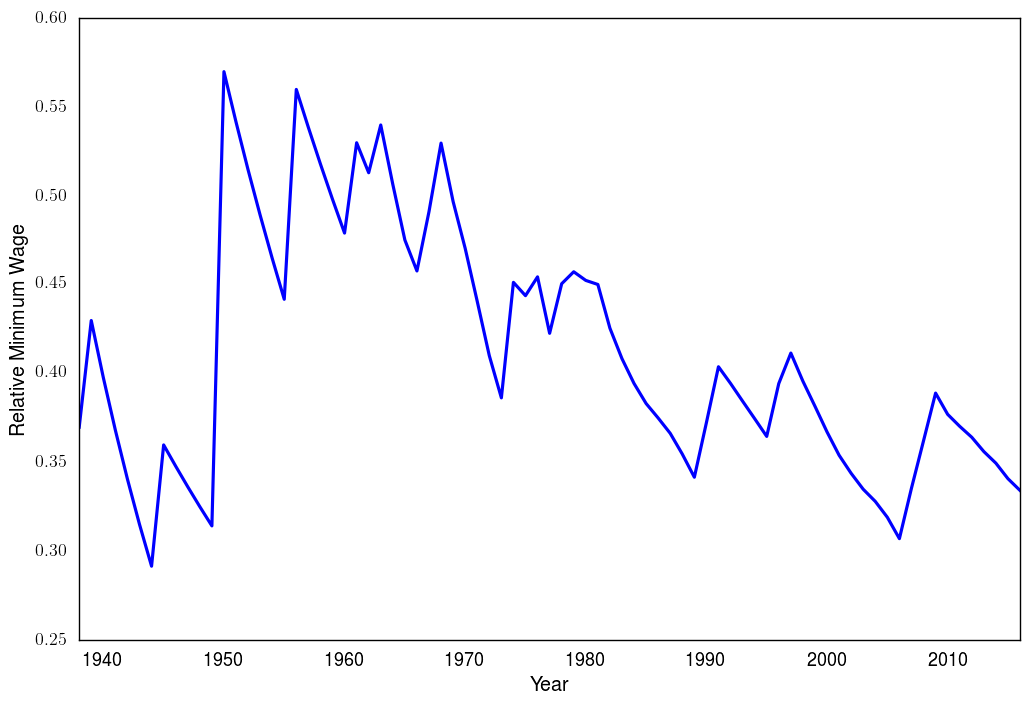

In [37]:
fig1, ax1 = plt.subplots()
ax1.plot(min_wages_ratio)
ax1.set_ylabel('Relative Minimum Wage')
ax1.set_xlabel('Year')
ax1.tick_params(top='off', bottom='off', right='off', left='off')

plt.tight_layout()
plt.savefig('figures/minimum_wage_sawtooth.pdf')

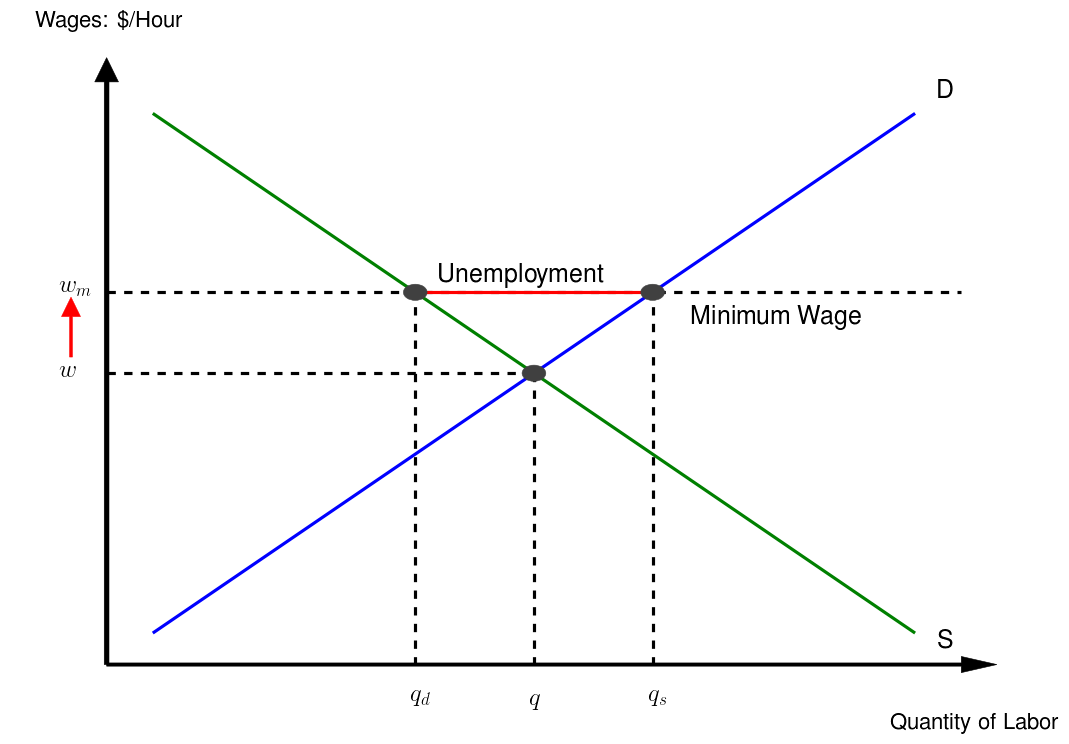

In [36]:
fig2, ax2 = plt.subplots()
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax2.plot([.1, .9], [.1, .9], transform=ax2.transAxes, color='blue', linestyle='solid', zorder=1)
ax2.plot([.1, .9], [.9, .1], transform=ax2.transAxes, color='green', linestyle='solid', zorder=1)

ax2.annotate(xy=(.8, .8), xytext=(.85, .85), s='D', fontsize=18)
ax2.annotate(xy=(.8, -.8),xytext=(.85, -.85), s='S', fontsize=18)

ax2.axhline(y=.25, xmin=.05,xmax=.95 , linestyle='dashed', color='black', zorder=0)
ax2.axhline(y=.25, xmin=.75/2,xmax=1.25 / 2 , linestyle='solid', color='red', zorder=1)
ax2.axhline(y=0, xmin=.05,xmax=.5 , linestyle='dashed', color='black', zorder=0)

ax2.annotate(s='Unemployment', xy=(0, .25), xytext=(-.20, 0.28), fontsize=18, weight='bold')


ax2.axvline(x=0, ymin=.05,ymax=.5 , linestyle='dashed', color='black', zorder=0)
ax2.axvline(x=.25, ymin=.05,ymax=1.25 / 2 , linestyle='dashed', color='black', zorder=0)
ax2.axvline(x=-.25, ymin=.05,ymax=1.25 / 2 , linestyle='dashed', color='black', zorder=0)

ax2.add_patch(plt.Circle((.25, .25), radius=0.025, color='0.25', zorder=2))
ax2.add_patch(plt.Circle((-.25, .25), radius=0.025, color='0.25', zorder=2))
ax2.add_patch(plt.Circle((0, 0), radius=0.025, color='0.25', zorder=2))
ax2.annotate(s='Minimum Wage', xy=(.25, .25), xytext=(.33, 0.15), fontsize=18, weight='bold')


ax2.arrow(x=-.9, y=-.9, dx=1.8, dy=0, width=.01, head_width=.05, color='black')
ax2.arrow(x=-.9, y=-.9, dx=0, dy=1.8, width=.01, head_width=.05, color='black')

ax2.annotate(xy=(-.9, .9), xytext=(-1.05, 1.07), s='Wages:  \$/Hour', fontsize=16)
ax2.annotate(xy=(.9, -.9), xytext=(.75,-1.1), s='Quantity of Labor', fontsize=16)

plt.axis('off')
ax2.annotate(xy=(.25, -.9), xytext=(.24,-1.025), s='$q_s$', fontsize=18)
ax2.annotate(xy=(0, -.9), xytext=(-.01, -1.025), s='$q$', fontsize=18)
ax2.annotate(xy=(-.25, -.9), xytext=(-.26, -1.025), s='$q_d$', fontsize=18)
ax2.annotate(xy=(-1, .25), xytext=(-1,.24), s='$w_m$', fontsize=18)
ax2.annotate(xy=(-1, 0), xytext=(-1, -.01), s='$w$', fontsize=18)

ax2.arrow(x=-.975, dx=0, y=.05, dy=.125, width=.006, color='red', head_width=.04)

plt.tight_layout()
plt.savefig('figures/supply_and_demand.pdf')


In [11]:
question_responses = pd.DataFrame(data=[0, 34, 24, 32, 0, 3], 
                                  index=['Strongle Agree', 'Agree','Uncertain', 'Disagree', 
                                   'Strongly Disagree', 'No Opinion'])

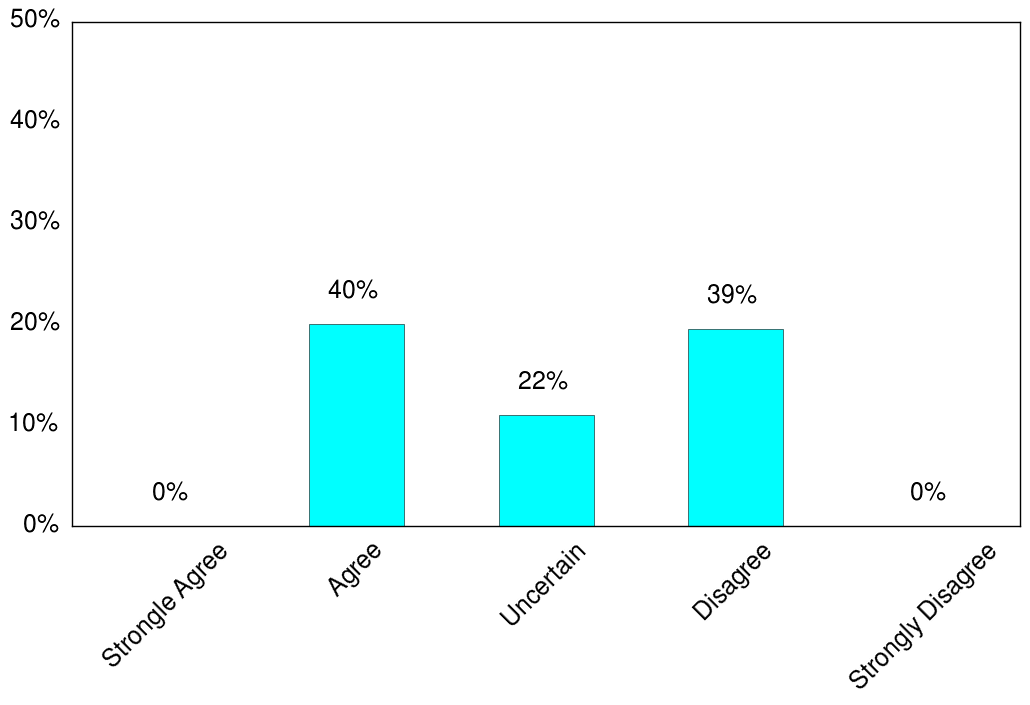

In [34]:
ax3 = question_responses.plot(kind='bar', legend=None, color='cyan')
ax3.set_ylim(0, 100)
for idx, val in enumerate(question_responses.values):
    ax3.annotate(xy=(idx,val), xytext=(idx - .075 * len(str(np.asscalar(val))), val + 5), 
                 s=str(np.asscalar(val)) + '\%', fontsize=18)
ax3.yaxis.set_ticklabels([str(val) + '\%' for val in np.arange(0, 100, 10)], fontsize=18)
ax3.xaxis.set_ticklabels(ax3.xaxis.get_ticklabels(), rotation=45, fontsize=18)
ax3.tick_params(top='off', bottom='off', right='off', left='off')
plt.tight_layout()
plt.savefig('figures/responses_chicago.pdf')

In [16]:
weighted_responses = pd.DataFrame(data=[0, 40, 22, 39, 0], 
                                  index=['Strongle Agree', 'Agree','Uncertain', 'Disagree', 
                                   'Strongly Disagree'])

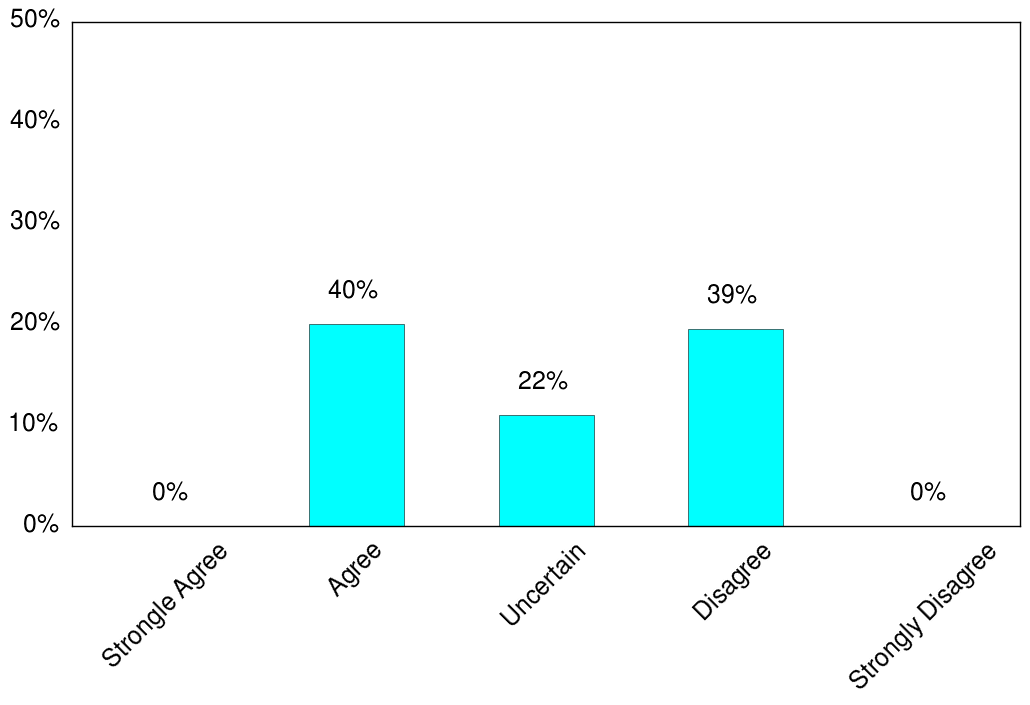

In [35]:
ax4 = weighted_responses.plot(kind='bar', legend=None, color='cyan')
ax4.set_ylim(0, 100)
for idx, val in enumerate(weighted_responses.values):
    ax4.annotate(xy=(idx,val), xytext=(idx - .075 * len(str(np.asscalar(val))), val + 5), 
                 s=str(np.asscalar(val)) + '\%', fontsize=18)
ax4.yaxis.set_ticklabels([str(val) + '\%' for val in np.arange(0, 100, 10)], fontsize=18)
ax4.xaxis.set_ticklabels(ax3.xaxis.get_ticklabels(), rotation=45, fontsize=18)
ax4.tick_params(top='off', bottom='off', right='off', left='off')
plt.tight_layout()
plt.savefig('figures/responses_weighted_by_confidence.pdf')